In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib as plt
import seaborn as sns
import feather

In [13]:
uuids = [ #SAME
    '61017dbbf8b1afba48b7822e',
'6116aa4d3c4d9eae26b66171',
'6109b8238588407db4764ec1',
'611841738f4e8342f5ba3765',
'6108649840bf2b927ef3905c',
'5f4f8e8f9213e9056223e128',
'613290e8a4520dd8d0cc061a',
'61217de916b53da848302312',
'61338d61ed3f2e3d196fa7c7',
         
         #DIFF
'610995bd91de0e899effd73d',
'599186630675b100014daddd',
'6119884fd696463d717432c9',
'610bb05be2e705f3e47e87fb',
'60f0937892bd49086d6e2a77',
'5cf656e90acc8f000147f643',
'5fe292a28fd71dea34d04453',
'5d341b57a48ae7000114152a',
    
    #batch1
    "6110e7ae08023ecb9207b05e",
"5fec7577ad8fbadf15cd5607",
"615f1500b60d25e2660e8644",
"615ec4f34cb81d7e58fa144c",
"5cd5fe480f0de600018e7251",
"60f44f7a57468d4e9f87fa5b",
"6160011304f5319ece189bfa",
"5af196e1e1b5b8000148ac76",
"6154284fc5154abb9a264b0c",
"6147d726fa94eb7d5c2de156",
"6160403f5164508979e6358d",
"56210effed6e5a000ac7f3a5",
"6156ee007bdef87eb5b4aeb0",
"61085b8ec672d0e88151d5ae",
    "57313ba2070de6000f43384e",
    "615d9f86fdd5e127d783e850",
"614f23537aab4e64abfd53ae",
"61533356ce435e5a4a4addd0",
"6152218517a89c5b41e18a06",
"615f0726cbd12330a2d82556"
    
    #batch2
    
    
    #batch3
    
    
    #batch4
    
    
    #batch5
    
]

## Sample final pilot's DIFF players trials

In [7]:
with open("./data/archive/diff_picked_col.json", "r", encoding='utf-8') as f:
    diff_col_pick = json.load(f)

In [8]:
with open("./data/archive/diff_reported_col.json", "r", encoding='utf-8') as f:
    diff_col_report = json.load(f)

In [9]:
with open("./data/archive/diff_n_red.json", "r", encoding='utf-8') as f:
    diff_n_red = json.load(f)

In [10]:
diff_n_red.keys() == diff_col_pick.keys()

True

In [14]:
dfs = []

for uuid in uuids:
    if uuid not in diff_col_pick:
        continue
    pick = diff_col_pick[uuid]
    outcome = diff_col_report[uuid]
    n_red = diff_n_red[uuid]
    dfs.append(pd.DataFrame({"pick": pick, "outcome": outcome, "n_red": n_red}))

In [15]:
agg_df = pd.concat(dfs)
agg_df['lied'] = agg_df['pick'] != agg_df['outcome']

In [ ]:
# agg_df.reset_index().to_feather("finalpilot_diff_batch1_trials.feather")

In [17]:
agg_df = pd.read_feather("./data/finalpilot_diff_batch1_trials.feather")

In [ ]:
for i in range(8):
    print(i)
    t_sample = agg_df.sample(90) #, random_state=0)
    print(sum(t_sample['lied']))
    t_sample[['n_red', 'outcome', 'lied']].iloc[:30].to_json('trials_diff'+str(i)+'_1.json', orient='records')
    t_sample[['n_red', 'outcome', 'lied']].iloc[30:60].to_json('trials_diff'+str(i)+'_2.json', orient='records')
    t_sample[['n_red', 'outcome', 'lied']].iloc[60:90].to_json('trials_diff'+str(i)+'_3.json', orient='records')

## Sample final pilot's SAME players trials

In [ ]:
with open("./data/archive/same_picked_col.json", "r", encoding='utf-8') as f:
    same_col_pick = json.load(f)

In [ ]:
with open("./data/archive/same_reported_col.json", "r", encoding='utf-8') as f:
    same_col_report = json.load(f)

In [ ]:
with open("./data/archive/same_n_red.json", "r", encoding='utf-8') as f:
    same_n_red = json.load(f)

In [ ]:
same_col_pick.keys() == same_n_red.keys()

In [ ]:
dfs = []

for uuid in uuids:
    if uuid not in same_col_pick:
        continue
    pick = same_col_pick[uuid]
    outcome = same_col_report[uuid]
    n_red = same_n_red[uuid]
    dfs.append(pd.DataFrame({"pick": pick, "outcome": outcome, "n_red": n_red}))

In [ ]:
agg_df = pd.concat(dfs)
agg_df['lied'] = agg_df['pick'] != agg_df['outcome']

In [ ]:
agg_df_s = pd.concat(dfs)

In [ ]:
agg_df_s['lied'] = agg_df_s['pick'] != agg_df_s['outcome']

In [ ]:
# agg_df_s.reset_index().to_feather("./data/finalpilot_same_batch1_trials.feather")

In [ ]:
for i in range(len(dfs)):
    print(i)
    t_sample = agg_df.sample(90) #, random_state=0)
    print(sum(t_sample['lied']))
    t_sample[['n_red', 'outcome', 'lied']].iloc[:30].to_json('trials_same'+str(i)+'_1.json', orient='records')
    t_sample[['n_red', 'outcome', 'lied']].iloc[30:60].to_json('trials_same'+str(i)+'_2.json', orient='records')
    t_sample[['n_red', 'outcome', 'lied']].iloc[60:90].to_json('trials_same'+str(i)+'_3.json', orient='records')

## Combine all past participant trials thus far and sample

In [2]:
fr_batch1 = pd.read_feather("./data/fr/all_data_long.feather")

In [19]:
prev = pd.read_feather('./data/trials_diffsamefrbatch1.feather')

In [31]:
prev

,pick,outcome,n_red,lied
0,-1,-1,5,False
1,-1,-1,5,False
2,-1,-1,6,False
3,-1,-1,6,False
4,-1,-1,6,False
...,...,...,...,...
3325,-1,-1,6,False
3326,-1,-1,2,False
3327,1,1,2,False
3328,-1,-1,3,False


In [20]:
fr = pd.read_feather("./data/fr/fr_batch2_data_long.feather")

In [40]:
# master_df.reset_index().to_feather("./data/trials_diffsamefrbatch12.feather")

In [2]:
master_df = pd.read_feather("./data/trials_diffsamefrbatch12.feather")

In [13]:
master_df

,pick,outcome,n_red,lied
0,-1,-1,5,False
1,-1,-1,5,False
2,-1,-1,6,False
3,-1,-1,6,False
4,-1,-1,6,False
...,...,...,...,...
5125,1,1,5,False
5126,-1,-1,1,False
5127,-1,-1,4,False
5128,-1,-1,2,False


In [12]:
del master_df['level_0']

In [21]:
fr = pd.read_feather("./data/fr/fr_batch4_data_long.feather")

In [4]:
fr = pd.read_feather("./data/fr/fr_batch6_data_long.feather")

In [6]:
fr2 = pd.read_feather("./data/fr/fr100_data_long.feather")

In [13]:
df = pd.concat([fr, fr2[list(fr)]])

In [25]:
fr = pd.DataFrame({"pick": df['col_picked'],
             "outcome": df['col_reported'],
                    "n_red": df['n_red'],
             "lied": df['col_reported']!=df['col_picked']})

In [26]:
fr

,pick,outcome,n_red,lied
0,1,-1,6,True
1,1,1,5,False
2,-1,-1,2,False
3,-1,-1,3,False
4,1,1,3,False
...,...,...,...,...
8995,1,1,3,False
8996,1,1,6,False
8997,-1,1,4,True
8998,-1,1,2,True


In [28]:
df.shape[0] == fr.shape[0]

True

In [29]:
df_lies = fr[fr['lied']==True]
df_honest = fr[fr['lied']==False]

In [30]:
df_lies.shape

(2511, 4)

In [31]:
df_honest.shape

(8019, 4)

In [35]:
batch

'rbatch1'

In [86]:
for i in range(110):
    sample_l = df_lies.sample(45)
    sample_h = df_honest.sample(45)
    t_sample = pd.concat([sample_l, sample_h])
    t_sample = t_sample.sample(frac=1).reset_index(drop=True)
#     print(t_sample)
    t_sample[['n_red', 'outcome', 'lied']].iloc[:30].to_json('./trial_setups/trials_'+batch+'_'+str(i)+'_1.json', orient='records')
    t_sample[['n_red', 'outcome', 'lied']].iloc[30:60].to_json('./trial_setups/trials_'+batch+'_'+str(i)+'_2.json', orient='records')
    t_sample[['n_red', 'outcome', 'lied']].iloc[60:90].to_json('./trial_setups/trials_'+batch+'_'+str(i)+'_3.json', orient='records')

In [41]:
from collections import Counter

Counter(fr['lied'])

Counter({True: 2511, False: 8019})

In [78]:
fr = fr.reset_index()

In [79]:
fr['tmpl'] = [1 if l else 0 for l in fr['lied']]

[Text(0.5, 0, '# red cards in trial')]

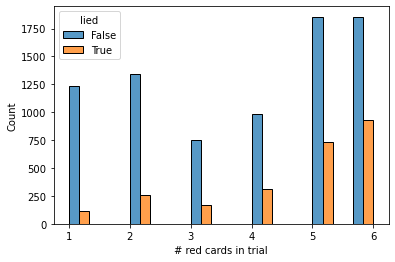

In [84]:
p = sns.histplot(data=fr, x="n_red", hue="lied", multiple="dodge")
p.set(xlabel="# red cards in trial")

### OLD BELOW

In [16]:
tmp = pd.DataFrame({"pick": fr['col_picked'],
             "outcome": fr['col_reported'],
                    "n_red": fr['n_red'],
             "lied": fr['col_reported']!=fr['col_picked']})

In [16]:
new_master = pd.concat([master_df, tmp]).reset_index(drop=True)

In [26]:
new_master = pd.concat([new_master, tmp])

In [32]:
new_master.head()

,pick,outcome,n_red,lied
0,-1,-1,5,False
1,-1,-1,5,False
2,-1,-1,6,False
3,-1,-1,6,False
4,-1,-1,6,False


In [29]:
new_master.reset_index(drop=True).to_feather("./data/trials_diffsamefrbatch1234.feather")

In [17]:
# for which data collection batch are we sampling:

batch = 'rbatch1'

In [33]:
for i in range(20):
    print("sample", i)
    t_sample = new_master.sample(90) #, random_state=0)
    print(sum(t_sample['lied']))
    t_sample[['n_red', 'outcome', 'lied']].iloc[:30].to_json('./trial_setups/trials_'+batch+'_'+str(i)+'_1.json', orient='records')
    t_sample[['n_red', 'outcome', 'lied']].iloc[30:60].to_json('./trial_setups/trials_'+batch+'_'+str(i)+'_2.json', orient='records')
    t_sample[['n_red', 'outcome', 'lied']].iloc[60:90].to_json('./trial_setups/trials_'+batch+'_'+str(i)+'_3.json', orient='records')

sample 0
25
sample 1
22
sample 2
20
sample 3
20
sample 4
25
sample 5
21
sample 6
21
sample 7
20
sample 8
11
sample 9
23
sample 10
16
sample 11
20
sample 12
19
sample 13
16
sample 14
25
sample 15
24
sample 16
25
sample 17
23
sample 18
24
sample 19
25


In [ ]:
from collections import Counter

for uuid in uuids:
    df = fr_batch1[fr_batch1['PID'] == uuid]
    print(Counter(df['outcome']))